# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',
                    sep='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [12]:
top_items = (
    chipo
    .groupby(
        by='item_name'
    )
    .agg(
        sales=('quantity', 'sum')
    )
    .sort_values(
        by='sales',
        ascending=False
    )
    .head(5)
)
top_items

,sales
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


<Axes: xlabel='item_name'>

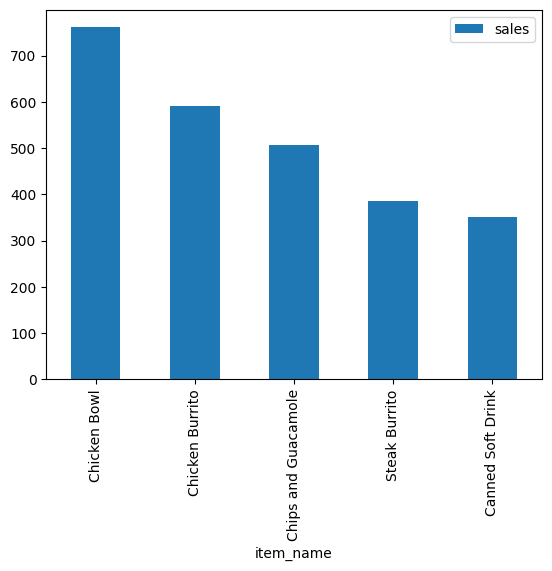

In [13]:
top_items.plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [19]:
# 달러 기호 제거 및 타입 변환
chipo['item_price'] = chipo['item_price'].apply(lambda price: float(price[1:]))
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [21]:
# 주문별 상품 개수, 주문금액 계산
orders = (
    chipo
    .groupby(
        by='order_id'
    )
    .agg(
        quantity=('quantity', 'sum'),
        price=('item_price', 'sum')
    )
)
orders

,quantity,price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


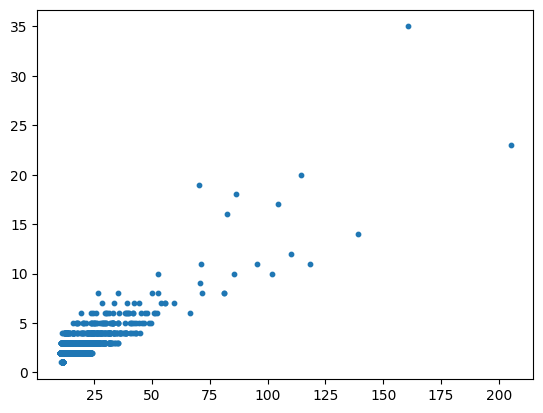

In [27]:
# 산점도 그리기
plt.scatter(
    x=orders['price'],
    y=orders['quantity'],
    s=10
)

### Step 7. BONUS: Create a question and a graph to answer your own question.

<Axes: >

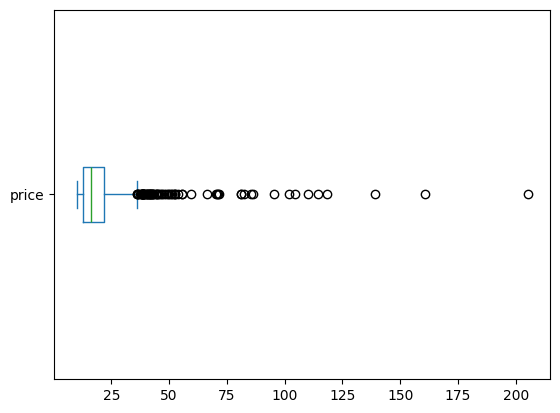

In [31]:
orders['price'].plot(kind='box', vert=False)

<Axes: ylabel='Density'>

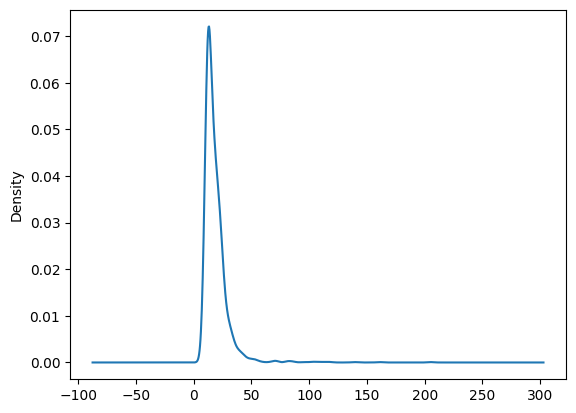

In [30]:
orders['price'].plot(kind='kde')